<center><img src="img/Sante-publique-France-logo.svg.png" style="width: 500px;"/></center>

**Application au service de la santé publique : Analyse exploratoire**

---

# Importation des librairies

In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

# Pandas settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

Versions :

In [2]:
print('Version des librairies utilisées :')
print('Python   : ' + sys.version)
print('NumPy    : ' + np.version.full_version)
print('Pandas   : ' + pd.__version__)
print('Seaborn  : ' + sns.__version__)

Version des librairies utilisées :
Python   : 3.8.12 (default, Oct 12 2021, 06:23:56) 
[Clang 10.0.0 ]
NumPy    : 1.20.3
Pandas   : 1.4.1
Seaborn  : 0.11.2


Style des tableaux :

In [3]:
%%html
<style>
    table {float:left}
</style>

# Importation des données

In [4]:
df_data = pd.read_csv(
    "data_cleaned.csv",
    encoding='utf8',
    sep=",",
    low_memory=False
)
df_data.head(2)

,code,image_url,product_name,pnns_groups_1,pnns_groups_2,manufacturing_places,categories,nutrition_grade_fr,additives_n,additives_fr,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,39529,http://fr.openfoodfacts.org/images/products/000/000/003/9529/front.3.400.jpg,Pack de 2 Twix,unknown,unknown,NaN,NaN,b,NaN,NaN,NaN,1481.00,4.17,7.52,77.08,15.93,6.20,6.25,1.37,0.54,-1.00
1,10187319,NaN,Mini Confettis,NaN,NaN,NaN,NaN,d,NaN,NaN,NaN,1753.00,12.63,0.80,19.14,87.70,0.90,0.60,0.01,0.00,14.00


In [5]:
df_data.describe()

,code,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,23955.00,6981.00,6981.00,23955.00,23955.00,23955.00,23955.00,23955.00,23955.00,23955.00,23955.00,23955.00,23955.00
mean,3915657638800.09,1.89,0.02,995.49,8.52,4.66,27.00,16.00,1.94,6.61,1.28,0.50,8.60
std,2064406952963.96,2.58,0.15,785.82,7.89,8.67,20.02,21.49,4.83,8.58,5.73,2.26,8.49
min,11501.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-13.00
25%,3250390213966.50,0.00,0.00,259.00,0.50,0.10,11.74,1.40,0.00,0.50,0.02,0.01,1.80
50%,3425601534384.00,1.00,0.00,879.00,8.05,1.03,23.20,7.00,0.30,4.00,0.25,0.10,8.00
75%,4008713732558.00,3.00,0.00,1561.00,13.31,5.80,37.90,20.90,2.20,9.00,1.10,0.43,15.00
max,54499000111678.00,20.00,2.00,3774.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,39.37,36.00


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23955 entries, 0 to 23954
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         23955 non-null  int64  
 1   image_url                    7614 non-null   object 
 2   product_name                 23955 non-null  object 
 3   pnns_groups_1                10074 non-null  object 
 4   pnns_groups_2                10154 non-null  object 
 5   manufacturing_places         2631 non-null   object 
 6   categories                   9358 non-null   object 
 7   nutrition_grade_fr           23955 non-null  object 
 8   additives_n                  6981 non-null   float64
 9   additives_fr                 4117 non-null   object 
 10  ingredients_from_palm_oil_n  6981 non-null   float64
 11  energy_100g                  23955 non-null  float64
 12  fat_100g                     23955 non-null  float64
 13  saturated-fat_10

- Visualisation des valeurs manquantes :

Text(0.5, 1.0, 'Valeurs manquantes')

<Figure size 864x2880 with 0 Axes>

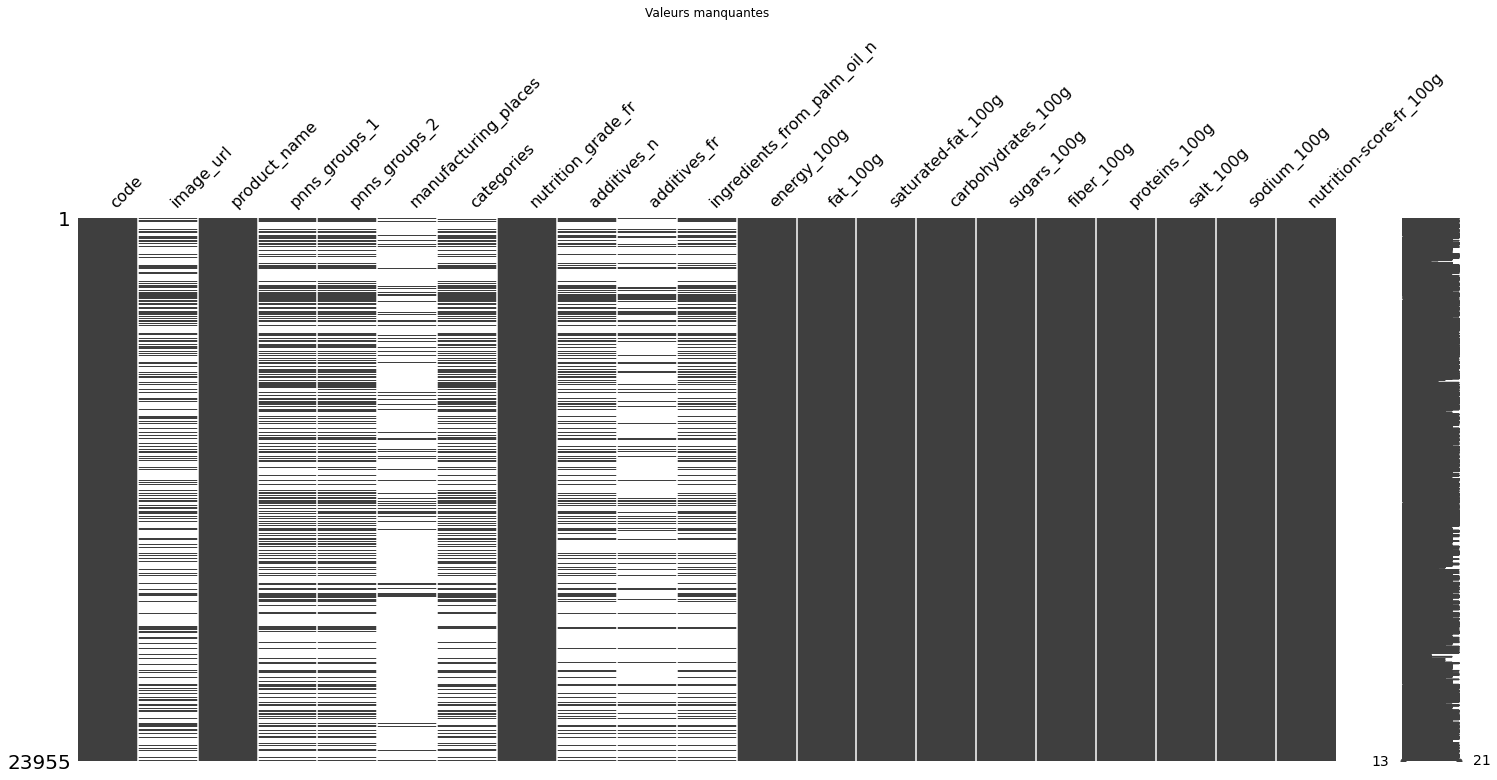

In [7]:
plt.figure(figsize=(12,40))
msno.matrix(df_data)
plt.title("Valeurs manquantes", pad=20)

- Mise en majuscule des nutri-grades :

In [8]:
df_data['nutrition_grade_fr'] = df_data['nutrition_grade_fr'].str.upper().apply(str)

- Variables nutritionnelles :

In [9]:
# nutrition columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# filter
df_nutri = df_data.select_dtypes(include=numerics)

In [10]:
nutri_cols_all = df_nutri.columns.tolist()
nutri_cols_all.remove('additives_n')
nutri_cols_all.remove('ingredients_from_palm_oil_n')

nutri_cols = nutri_cols_all.copy()
nutri_cols.remove('nutrition-score-fr_100g')
nutri_cols.remove('code')
print(*nutri_cols, sep = "\n")

energy_100g
fat_100g
saturated-fat_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g
sodium_100g


---

# Analyses univariées

## Distribution des Nutri-scores

Text(0, 0.5, 'Nombre de produits')

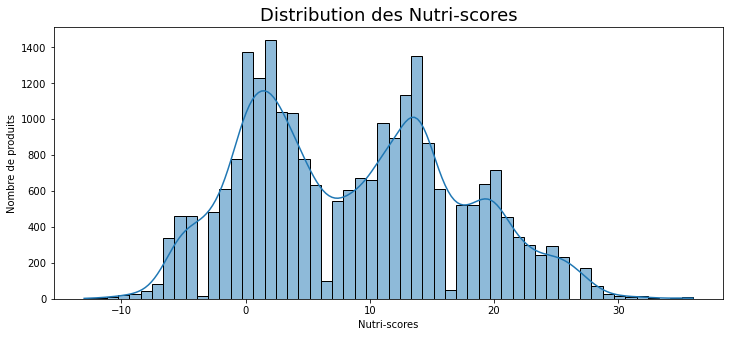

In [11]:
plt.figure(figsize=(12, 5))

sns.histplot(df_data['nutrition-score-fr_100g'], kde=True)
plt.title("Distribution des Nutri-scores", fontsize=18)
plt.xlabel('Nutri-scores')
plt.ylabel('Nombre de produits')

## Distribution des Nutri-grades

Text(0, 0.5, 'Nombre de produits')

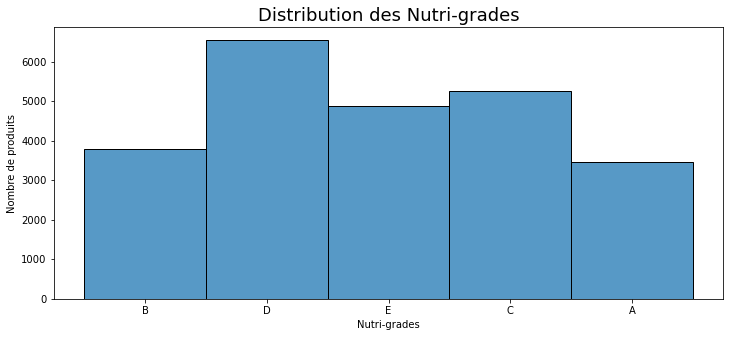

In [12]:
plt.figure(figsize=(12, 5))

sns.histplot(df_data['nutrition_grade_fr'])
plt.title("Distribution des Nutri-grades", fontsize=18)
plt.xlabel('Nutri-grades')
plt.ylabel('Nombre de produits')

## Distribution des données nutritionnels

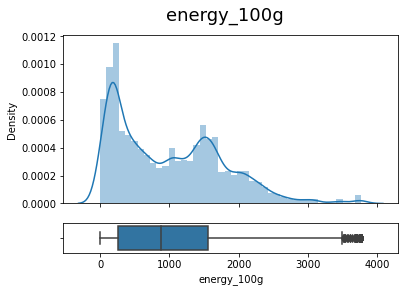

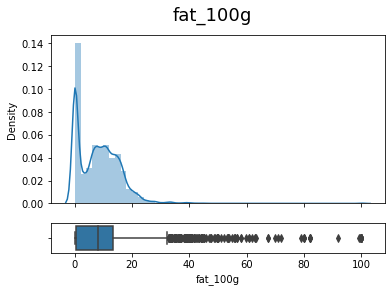

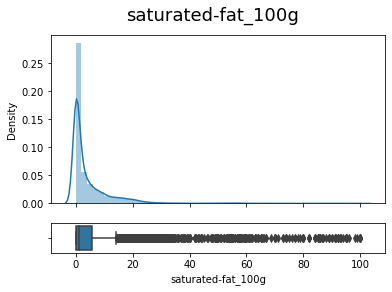

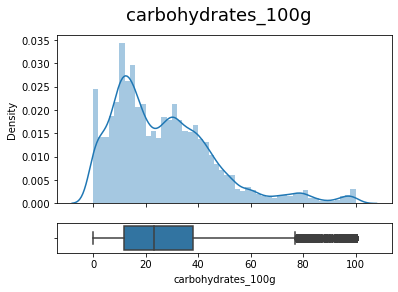

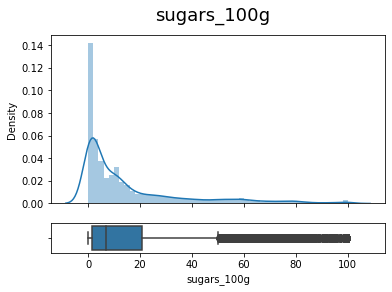

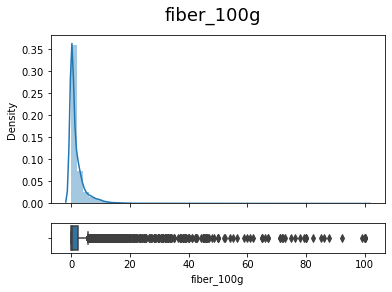

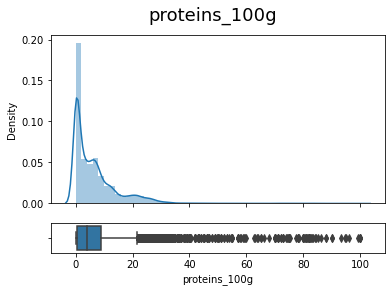

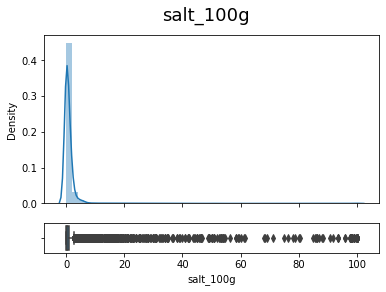

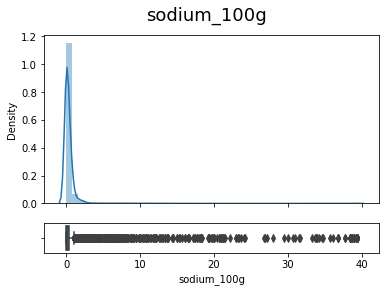

In [13]:
for feature in nutri_cols:

    f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})

    sns.distplot(df_data[feature], ax=ax_hist)
    sns.boxplot(df_data[feature], ax=ax_box)
    f.suptitle(feature, fontsize=18)

### Distribution des nutri-score par catégories

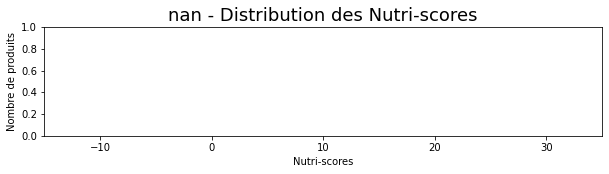

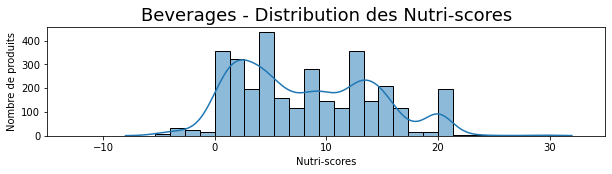

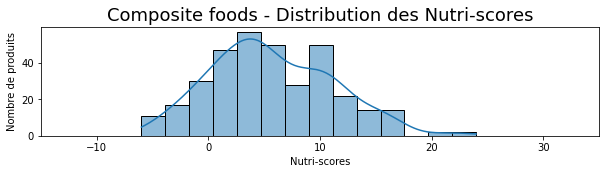

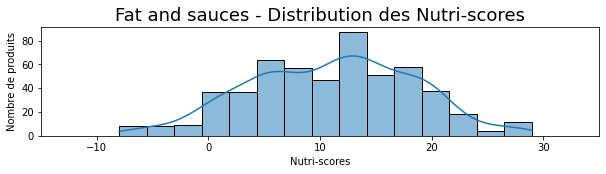

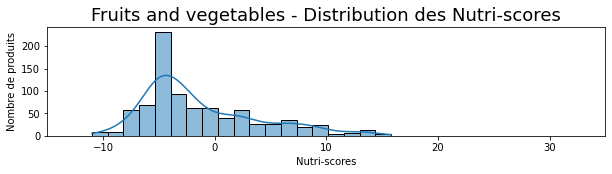

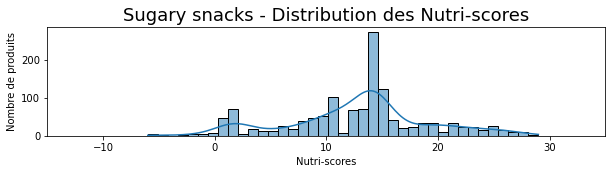

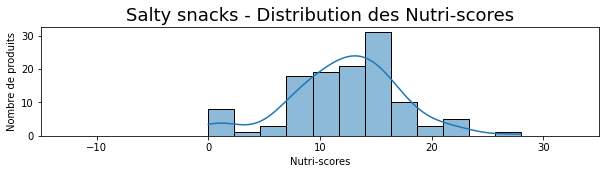

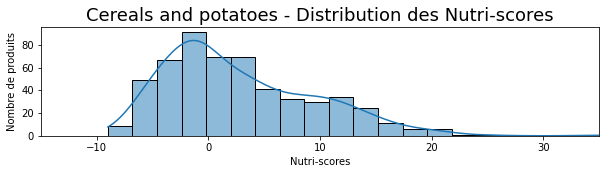

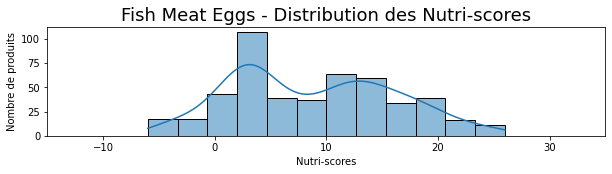

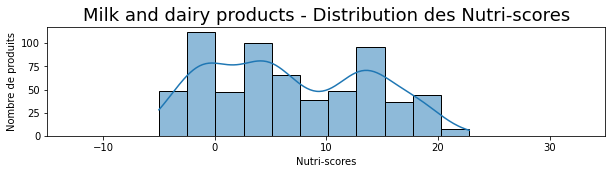

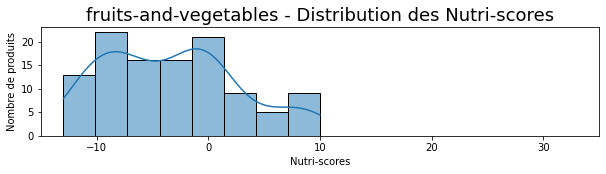

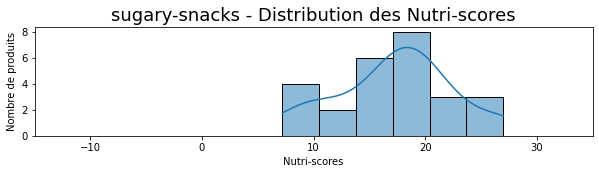

In [14]:
list_cat = df_data['pnns_groups_1'].unique()
list_cat = list_cat[list_cat != 'nan']
list_cat = list_cat[list_cat != 'unknown']

for cat in list_cat:
    df_temp = df_data[df_data['pnns_groups_1'] == cat]

    plt.figure(figsize=(10, 2))
    
    title = str(cat) + " - Distribution des Nutri-scores"

    sns.histplot(df_temp['nutrition-score-fr_100g'], kde=True)
    plt.xlim([-15, 35])
    plt.title(title, fontsize=18)
    plt.xlabel('Nutri-scores')
    plt.ylabel('Nombre de produits')
    plt.show()

---

# Analyses bivariées

Graphiques croisant variable numérique et categ
ou 2 variables numérique
Matrice corr

## Aperçu des relations entre variables

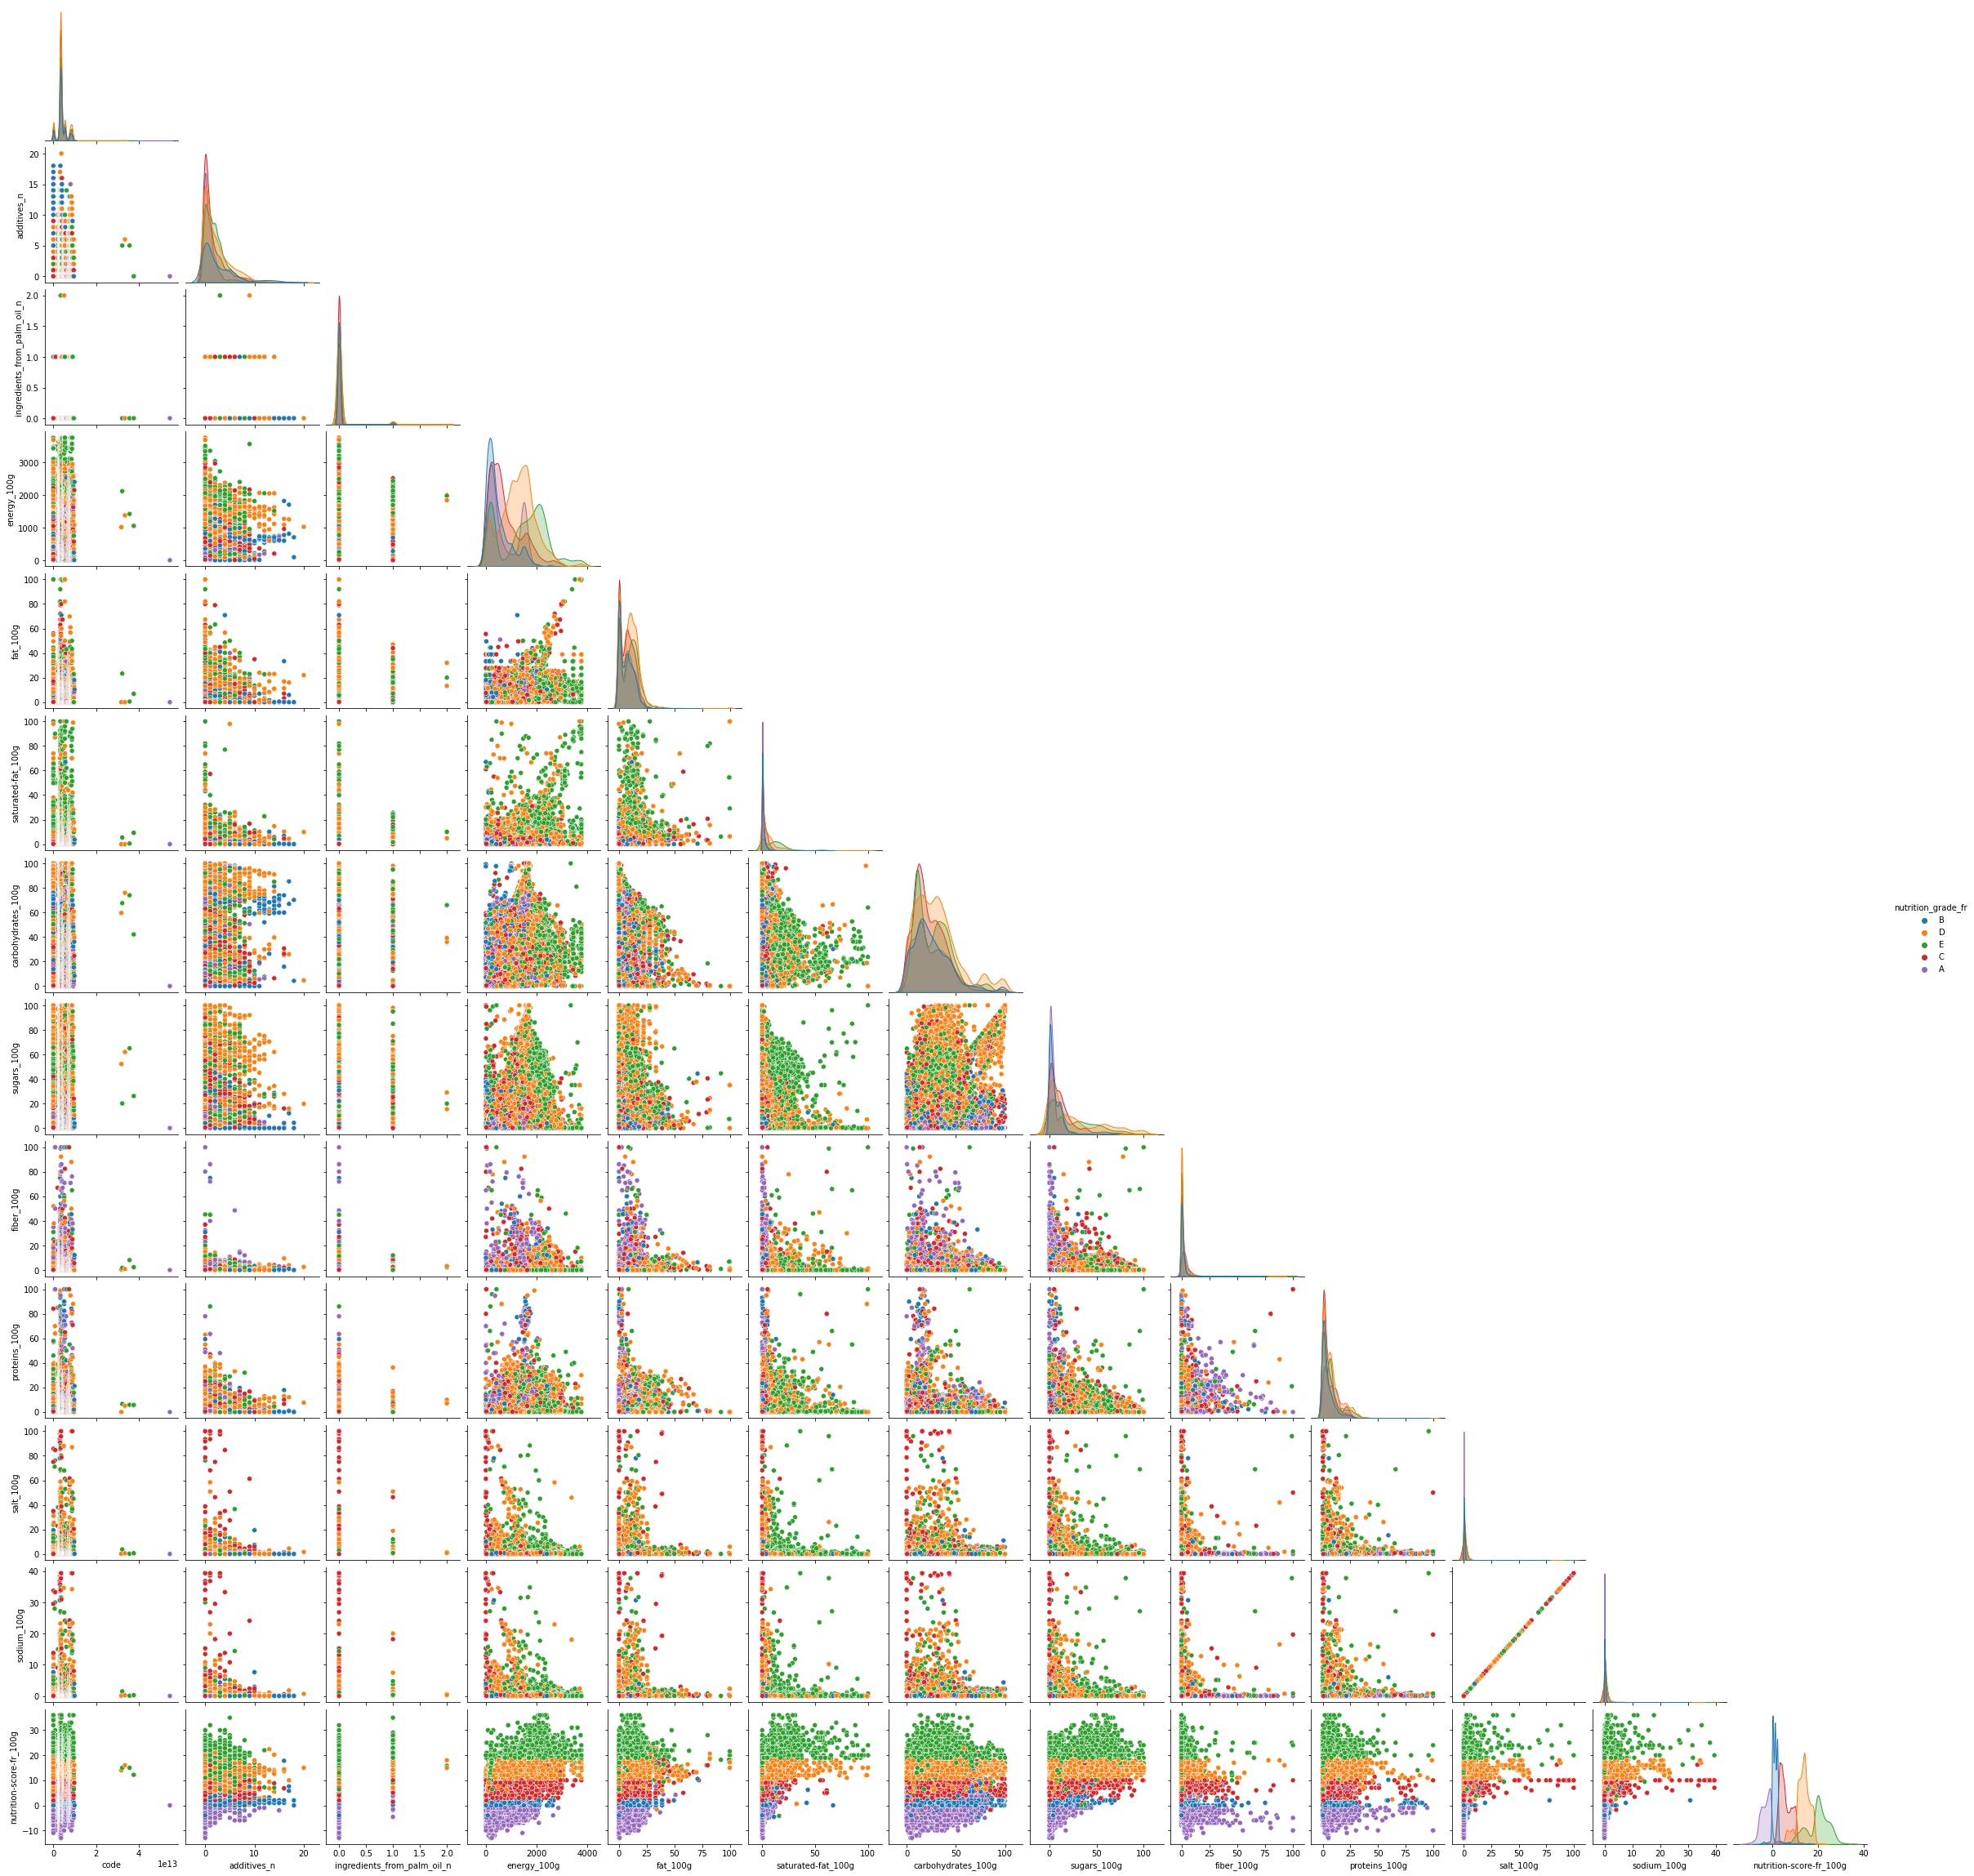

In [15]:
sns.pairplot(df_data, hue='nutrition_grade_fr', corner=True)

## Corrélations

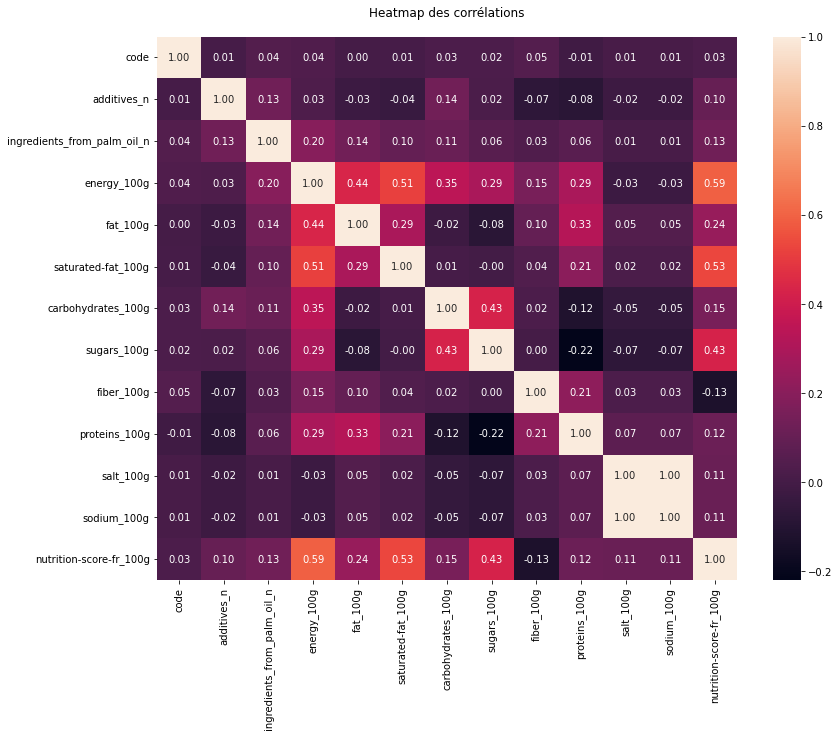

In [16]:
matrix = df_data.corr(method='pearson')

mask = np.triu(np.ones_like(matrix, dtype=np.bool))
plt.figure(figsize=(13, 10))
sns.heatmap(matrix, annot=True, fmt=".2f")
plt.title("Heatmap des corrélations", pad=20)
plt.show()

- Les variables **energy_100g** et **fat_100g** semblent être avec une valeur de 0,44.
- **energy_100g** et **saturated-fat_100g** affichent une corrélation de 0,51.
- **sugars_100g** et **carbohydrates_100g** semble avoir une corrélation de 0,43.

Les variables qui jouent un rôle important dans un nutri-score élevé sont :
- **energy_100g** : 0,59
- **saturated-fat_100g*** : 0,53
- **sugars_100g*** : 0,43

## Valeurs nutrionnelles par nutri-grade

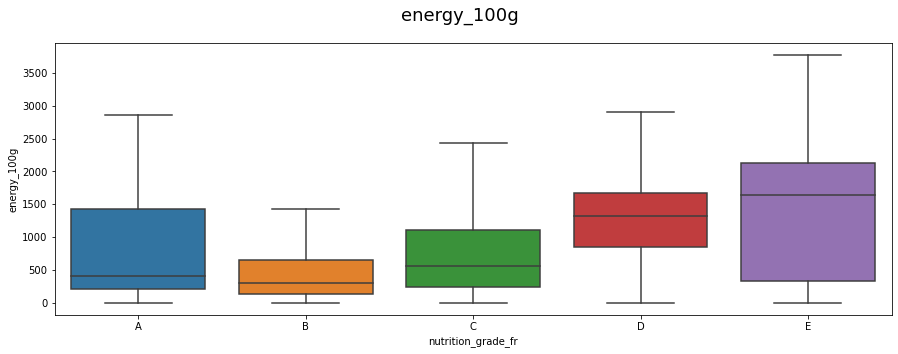

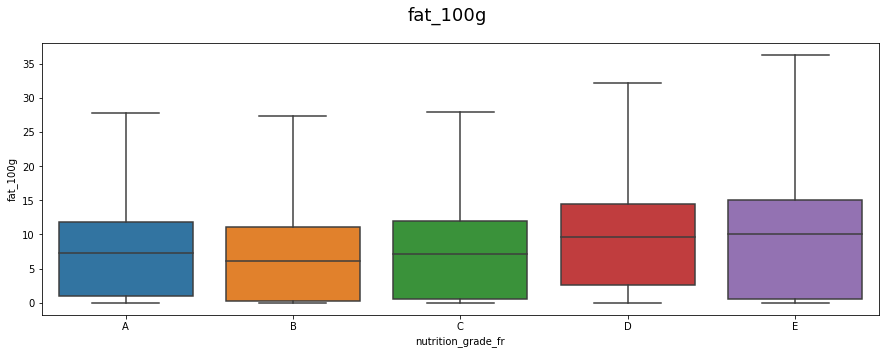

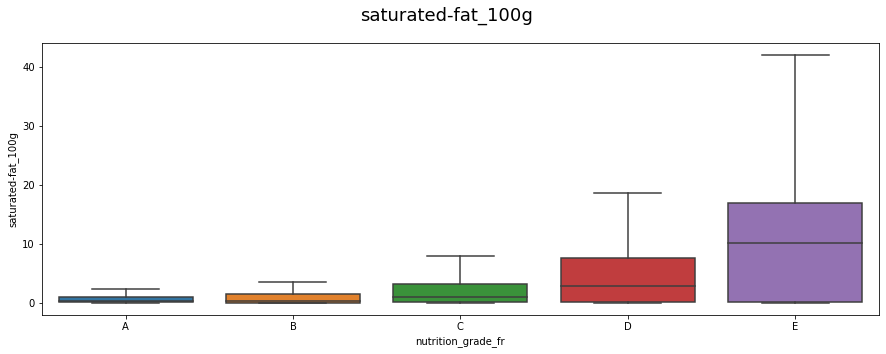

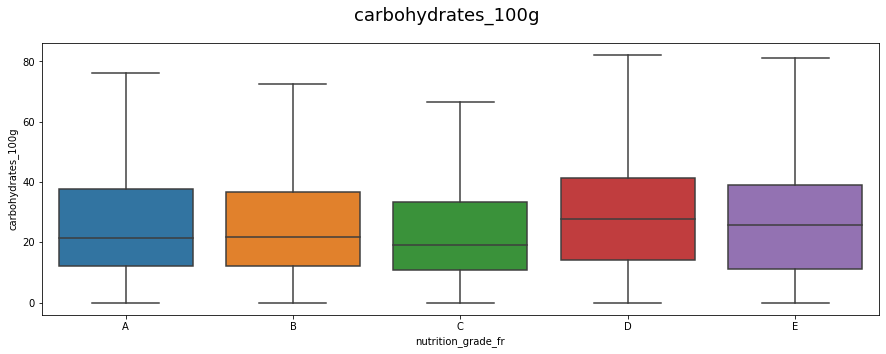

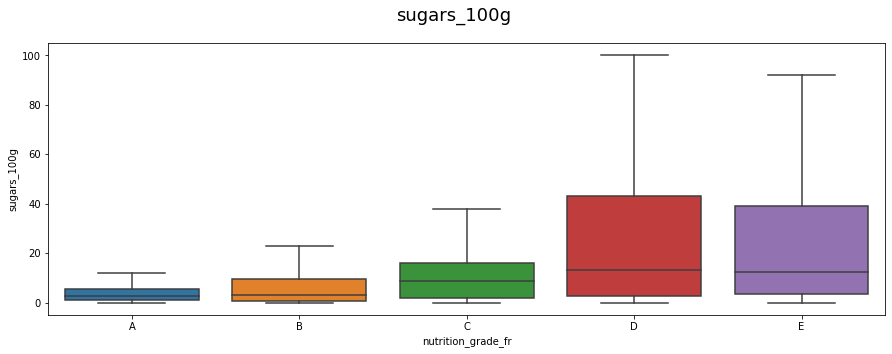

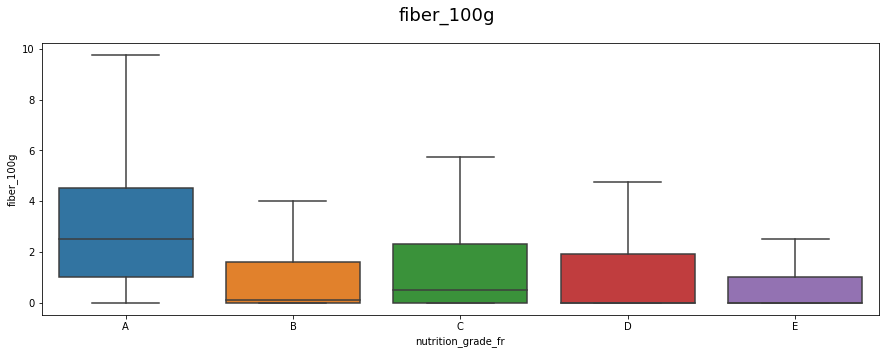

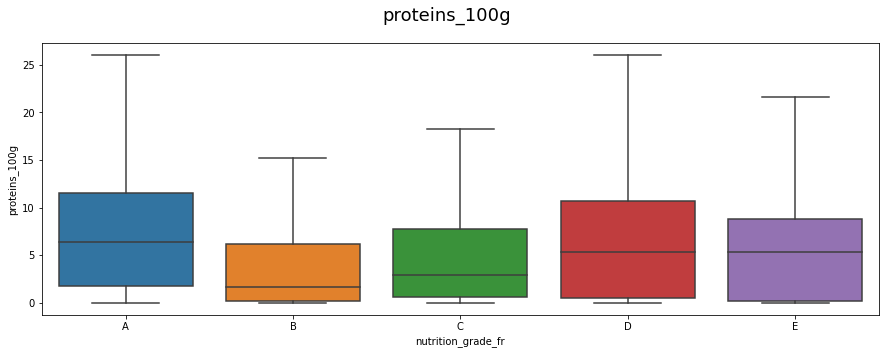

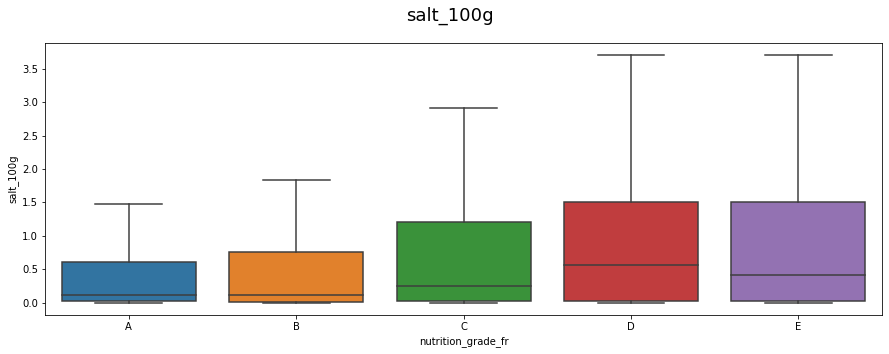

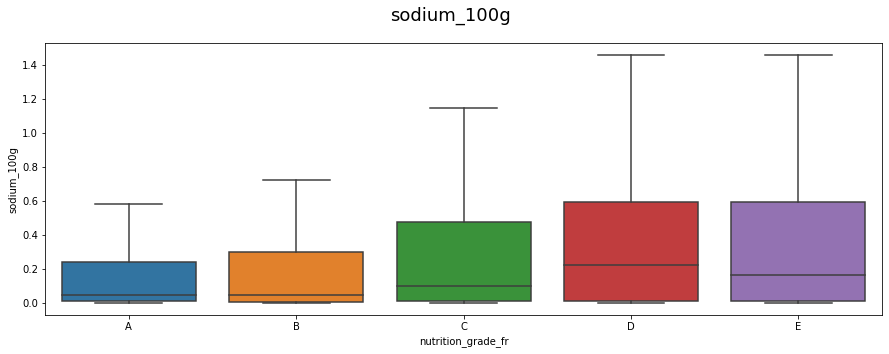

In [17]:
for col in nutri_cols:
  f = plt.figure(figsize=(15,5))
  f.suptitle(col, fontsize=18)

  sns.boxplot(
      data = df_data,
      x = 'nutrition_grade_fr',
      y = col,
      showfliers = False,
      order = df_data['nutrition_grade_fr'].sort_values().unique()
  )

## Sucre / Glucose

Text(0.5, 0.98, 'Distribution des sucres')

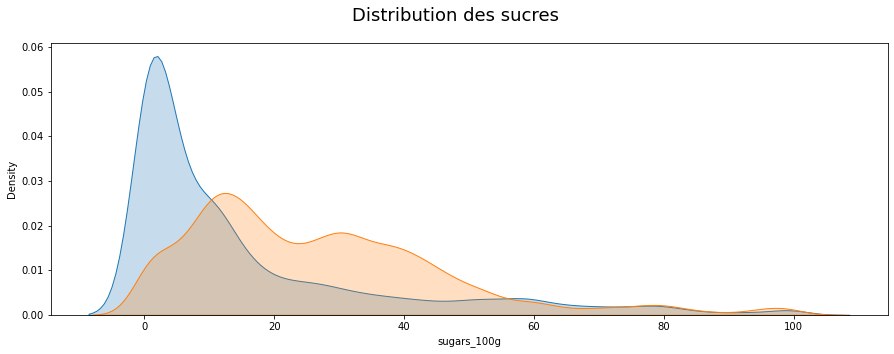

In [18]:
f, axes = plt.subplots(figsize=(15, 5))

sns.kdeplot(df_data['sugars_100g'], label='sugars_100g', shade=True)
sns.kdeplot(df_data['carbohydrates_100g'], label='carbohydrates_100g', shade=True)
f.suptitle("Distribution des sucres", fontsize=18)

## Graisses / Graisses saturées

Text(0.5, 0.98, 'Distribution des graisses')

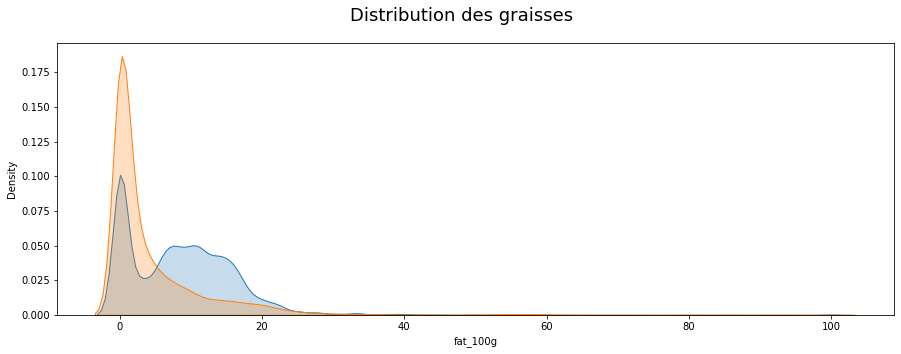

In [19]:
f, axes = plt.subplots(figsize=(15, 5))

sns.kdeplot(df_data['fat_100g'], label='fat_100g', shade=True)
sns.kdeplot(df_data['saturated-fat_100g'], label='saturated-fat_100g', shade=True)
f.suptitle("Distribution des graisses", fontsize=18)

## Groupes de produits

---

# Analyses multivariées

## Analyse en Composantes Principales (ACP)

Fonction de visualisation :

In [20]:
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center',
                                 rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            # plt.show(block=False)
            plt.show()
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

### Implémentation

In [21]:
from sklearn import decomposition
from sklearn import preprocessing

# choix du nombre de composantes à calculer
n_comp = 8

# sélection des colonnes à prendre en compte dans l'ACP
data_pca = df_data[nutri_cols]

# préparation des données pour l'ACP
X = data_pca.values
names = df_data.index
features = nutri_cols

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=8)

### Eboulis des valeurs propres

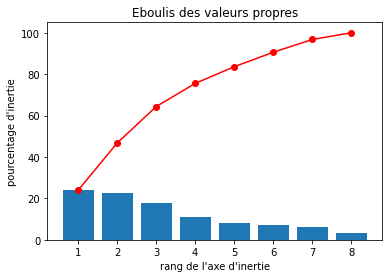

In [22]:
display_scree_plot(pca)
plt.show()

> On observe que 80% de l'inertie totale est réprésentée sur les 4 premières composantes.

### Visualisation des composantes

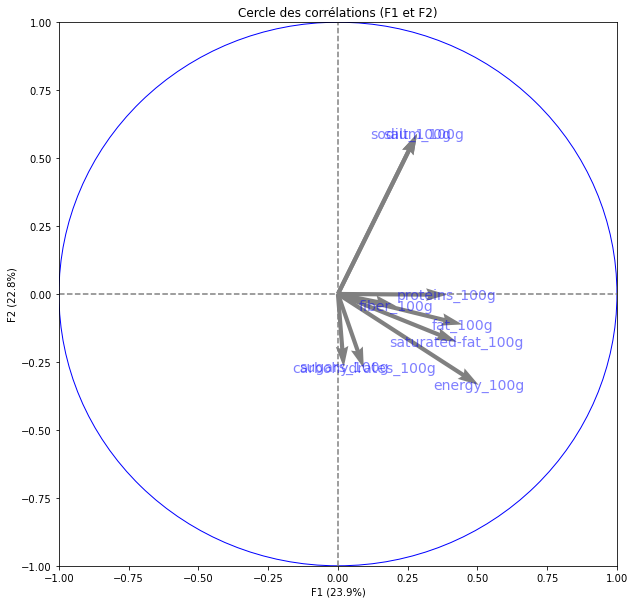

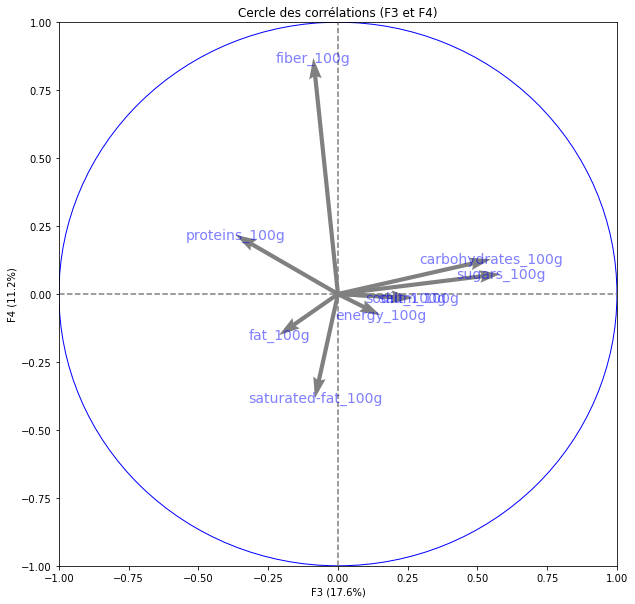

In [23]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

### Importance des features

In [24]:
features_importances = pd.DataFrame(
    data =[pca.components_[0],
           pca.components_[1],
           pca.components_[2],
           pca.components_[3]],
    index = ["F" + str(i+1) for i in range(4)], 
    columns = nutri_cols
)

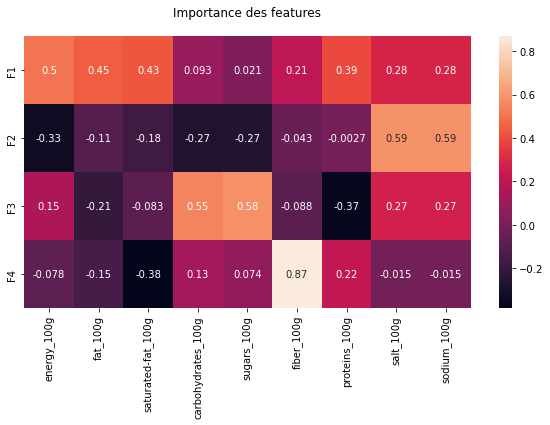

In [25]:
matrix = features_importances

mask = np.triu(np.ones_like(matrix, dtype=np.bool))
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True)
plt.title("Importance des features", pad=20)
plt.show()

### Composantes F1 et F2

Les composantes F1 et F2 représentent respectivement 24% et 23% de l'inertie.
- **energy_100g**, **fat_100g**, **saturated-fat_100g** et **proteins_100g** sont corrélés sur la composante F1.
- **salt_100g** et **sodium_100g** sont corrélés sur la composante F2.

> La composante F1 ne permet pas de faire un bonne distinction. Cependant, la composante F2 semble être plus représentative des valeurs en énergie et de la teneur en sels des produits.

### Composantes F3 et F4

Les composantes F3 et F4 représentent respectivement 18% et 11% de l'inertie.
- **carbohydrates_100g** et **sugar_100g** sont corrélés sur la composante F3.
- **proteins_100g** est corrélé négativement sur la composante F3.
- **fiber_100g** est corrélé sur la composante F4.
- **saturated-fat_100g** est corrélé négativement sur la composante F4.

> La composante F3 permet une distinction entre les produits sucrés ou protéinés. La composante F4 est liée à la teneur en fibre est aliments et les graisses saturées.

### Projection des catégories sur les composantes

Préparation des données :

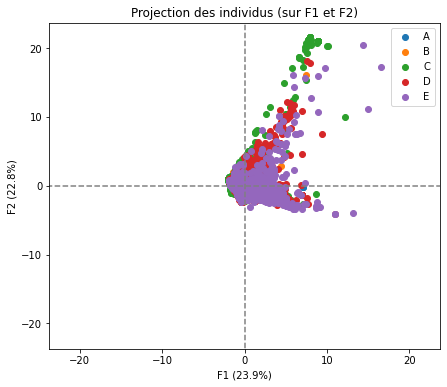

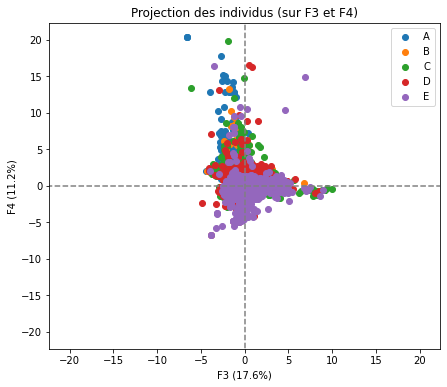

In [26]:
display_factorial_planes(pca.transform(X_scaled), n_comp, pca, [(0,1),(2,3)],
                         illustrative_var= df_data['nutrition_grade_fr'])
plt.show()

## Analyse explicative ANOVA

L'analyse ANOVA va nous permettre de montre les rélations entre les valeurs nutritionnelles (quantitatives) et les nutri-grade (qualitatives). Il s'agit d'une analyse de la variance qui permet de déterminer un rapport de corrélation (variance interclasse / variance totale).

### Fonction de calcul

In [27]:
def eta_squared(x,y):
    
    # x : qualitative
    # y : quantitative
    
    moyenne_y = y.mean()
    classes = []
    
    for classe in x.unique():
        yi_classe = y[x == classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
        
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    
    return round(SCE/SCT,4)

### Eta squared par variables :

In [28]:
for col in nutri_cols:
    print("{} : {} ".format(col, eta_squared(df_data['nutrition_grade_fr'], df_data[col])))

energy_100g : 0.2283 
fat_100g : 0.0255 
saturated-fat_100g : 0.2181 
carbohydrates_100g : 0.0212 
sugars_100g : 0.1563 
fiber_100g : 0.0436 
proteins_100g : 0.0197 
salt_100g : 0.0108 
sodium_100g : 0.0108 


> Les valeurs nutritionnelles qui influence le plus la classe du nutri-grade sont :
> - **saturated-fat_100g**
> - **energy_100g**
> - **sugars_100g**

## Conclusion